In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
import missingno as msno
import sys
sys.path.append(os.path.dirname(os.getcwd()))
from py_funcs.func_units import *

warnings.simplefilter('ignore')

sns.set_style("darkgrid")
dark_palette = sns.color_palette("colorblind")
sns.set_palette(dark_palette)
sns.set_color_codes("colorblind")

In [2]:
map_units = get_units()
map_units["URINE"] = "mL"
map_units = {k.upper(): v for k, v in map_units.items()}

# Missingo Matrix-Plot - Chart- and Labevents

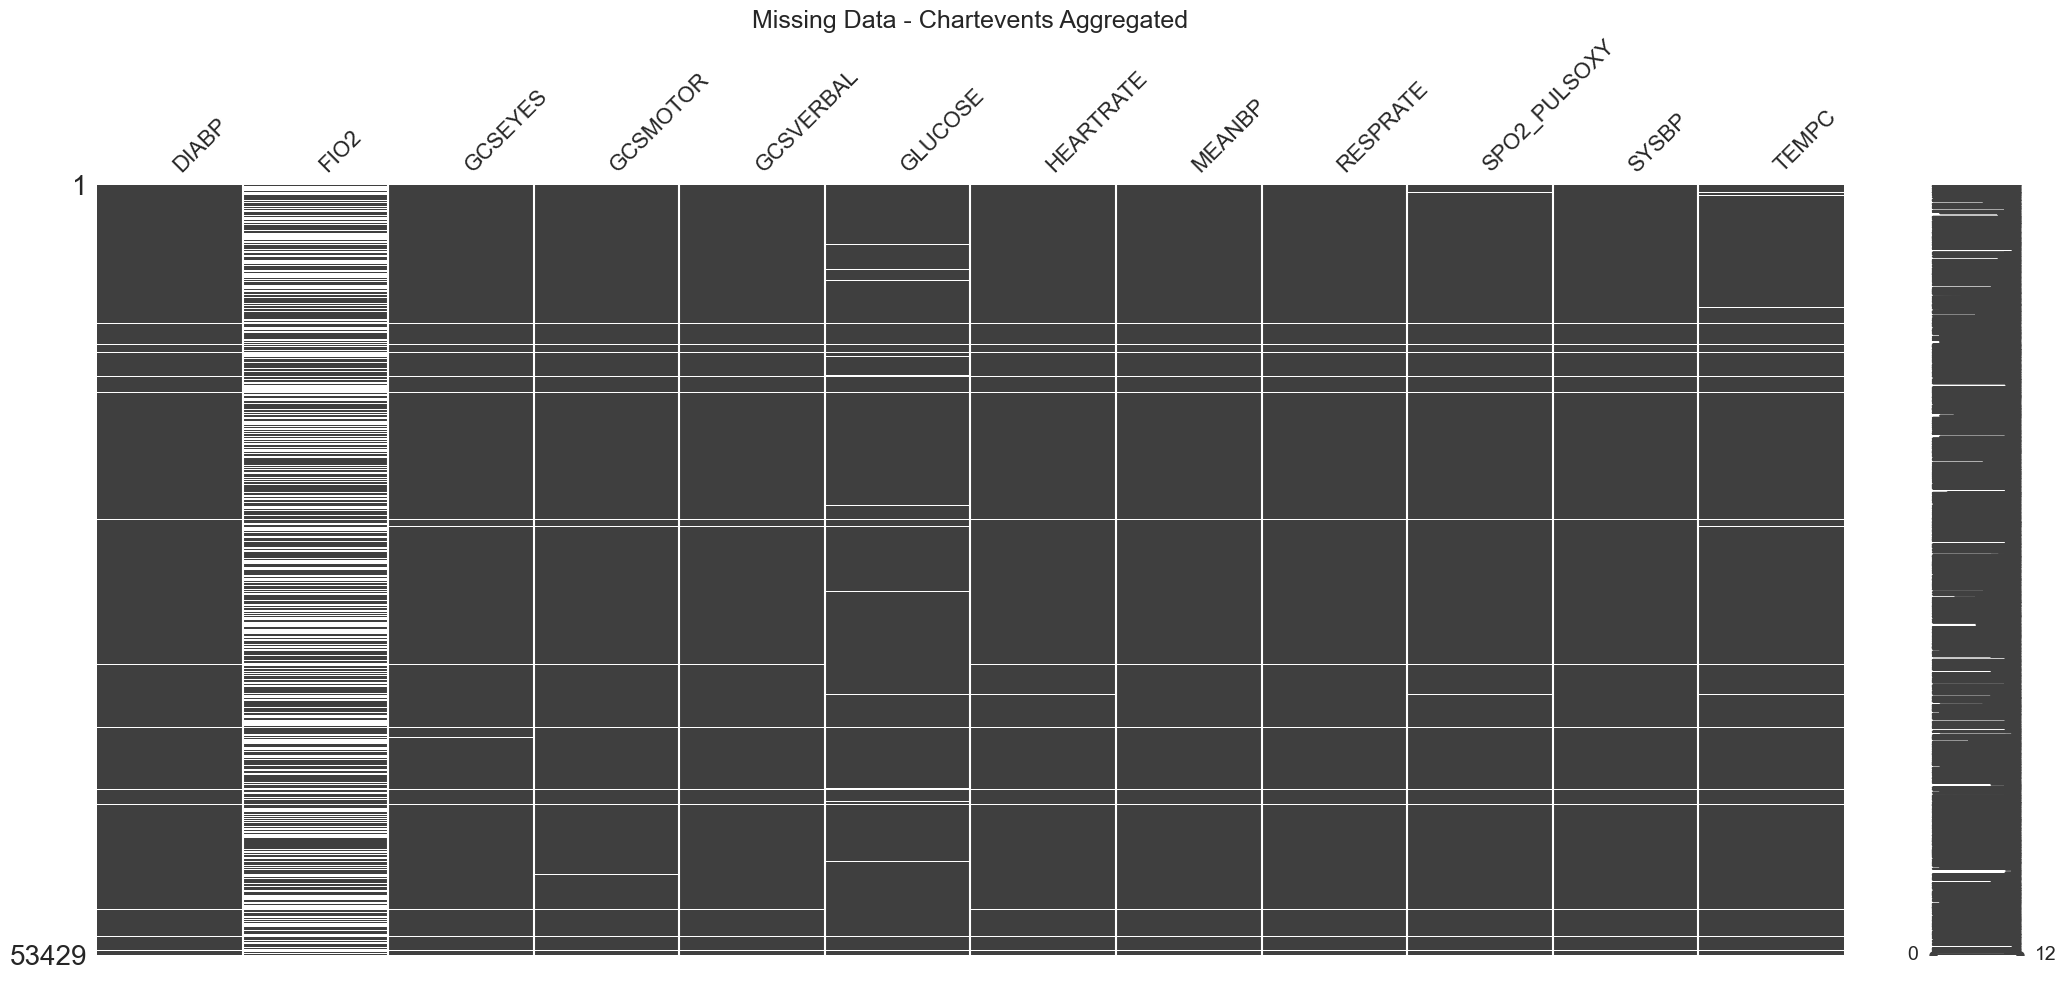

In [3]:
df_chartevents_time_shaped = pd.read_csv(project_path()+r"/data/temp_data/df_chartevents_time_shaped.csv", index_col=0)
data = df_chartevents_time_shaped.groupby("ICUSTAY_ID")[df_chartevents_time_shaped.iloc[:,4:].columns].max()

msno.matrix(data)
plt.title("Missing Data - Chartevents Aggregated", fontsize=18)
plt.show()

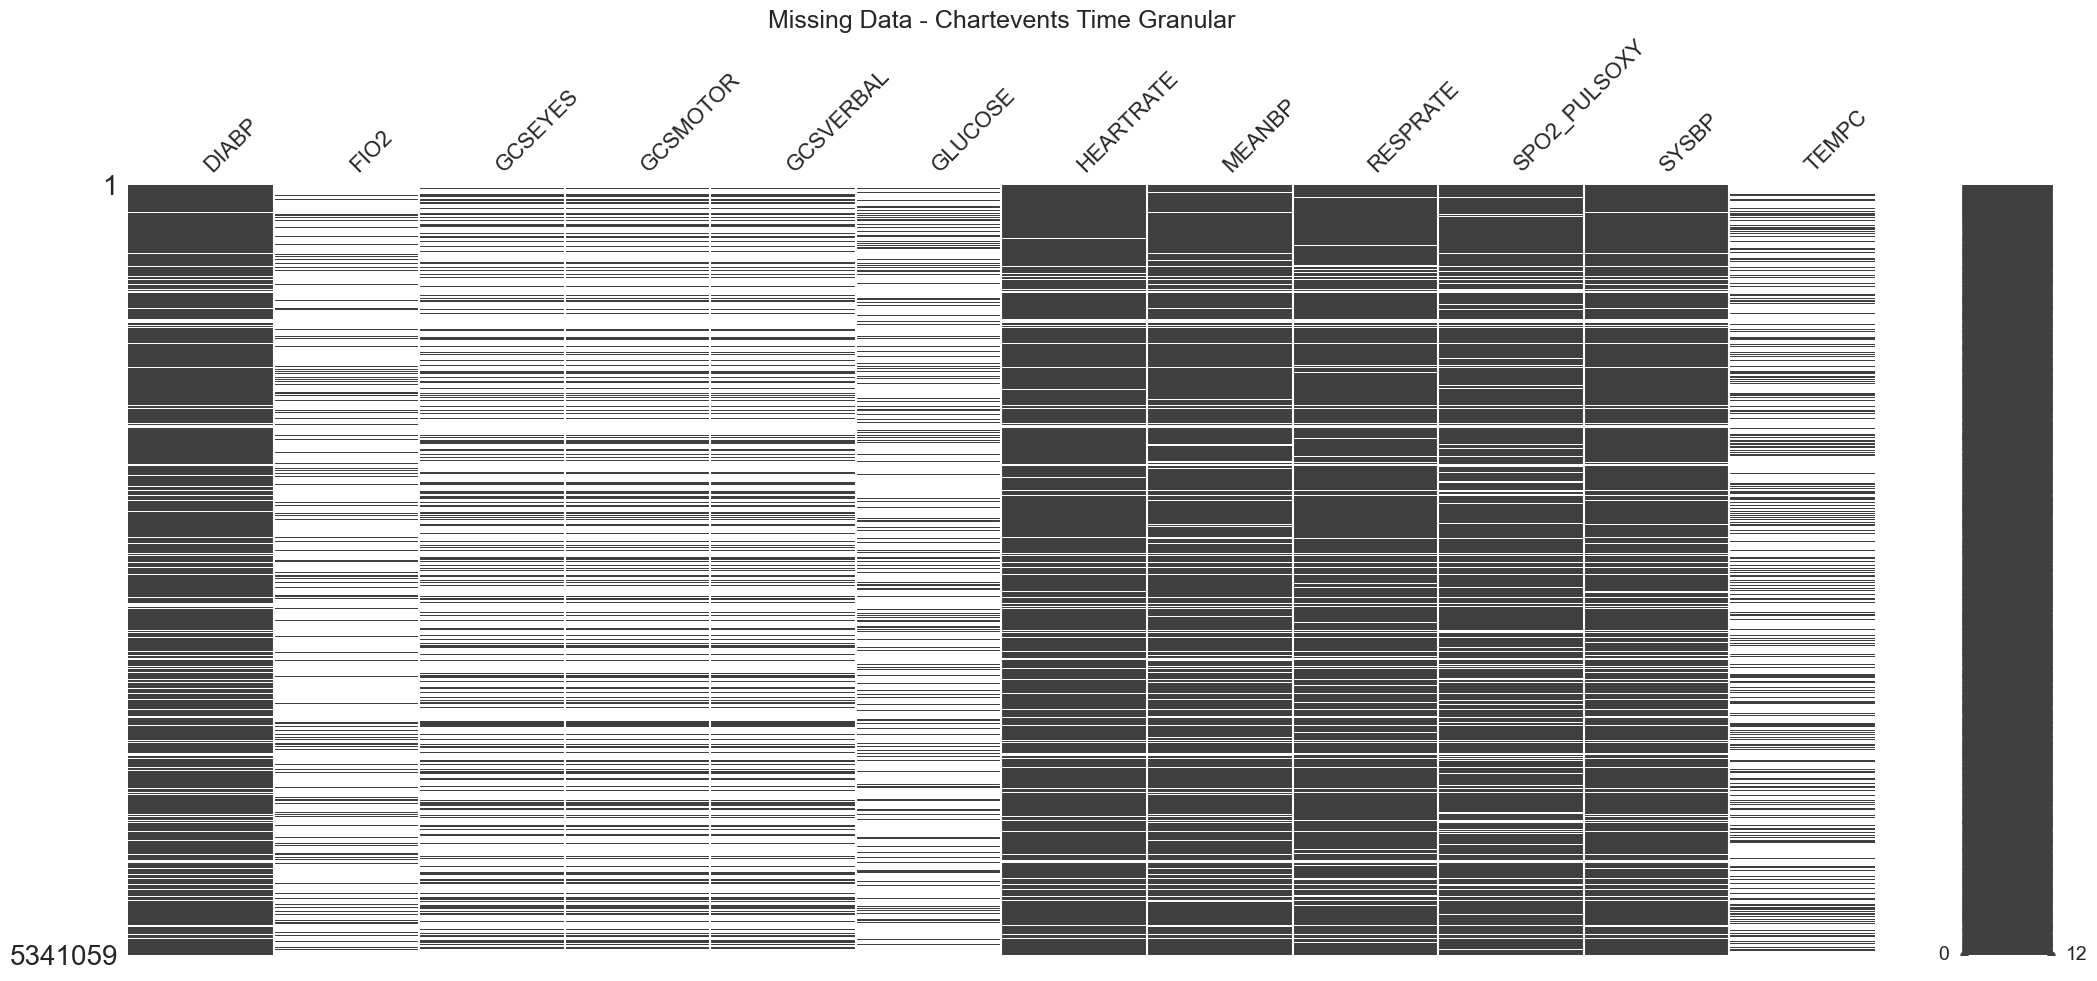

In [4]:
df_chartevents_time_shaped = pd.read_csv(project_path()+r"/data/temp_data/df_chartevents_time_shaped.csv", index_col=0)
data = df_chartevents_time_shaped.iloc[:,4:]

msno.matrix(data)
plt.title("Missing Data - Chartevents Time Granular", fontsize=18)
plt.show()

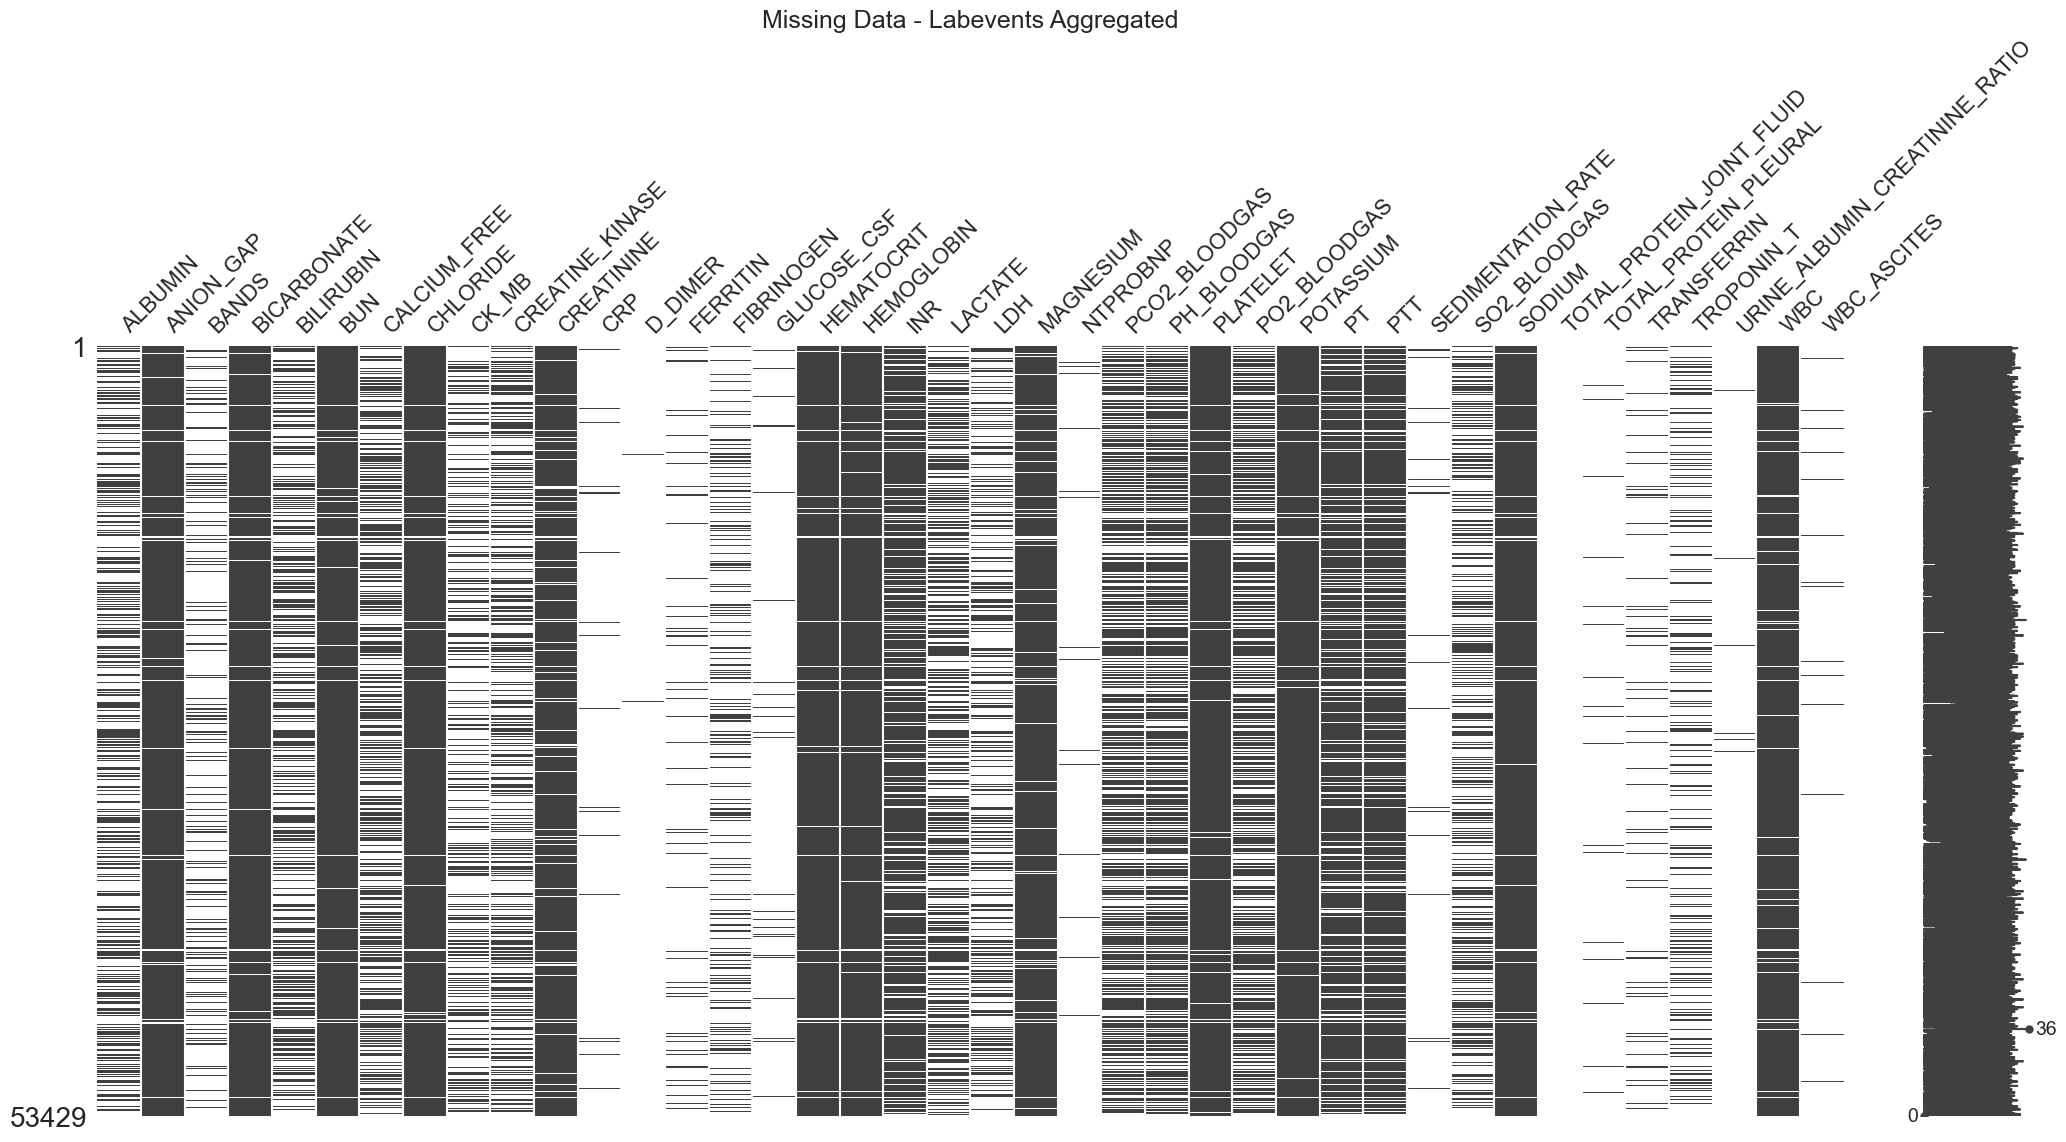

In [5]:
df_labevents_time_shaped = pd.read_csv(project_path()+r"/data/temp_data/df_labevents_time_shaped.csv", index_col=0)
data = df_labevents_time_shaped.groupby("ICUSTAY_ID")[df_labevents_time_shaped.iloc[:,4:].columns].max()
msno.matrix(data)
plt.title("Missing Data - Labevents Aggregated", fontsize=18)
plt.show()

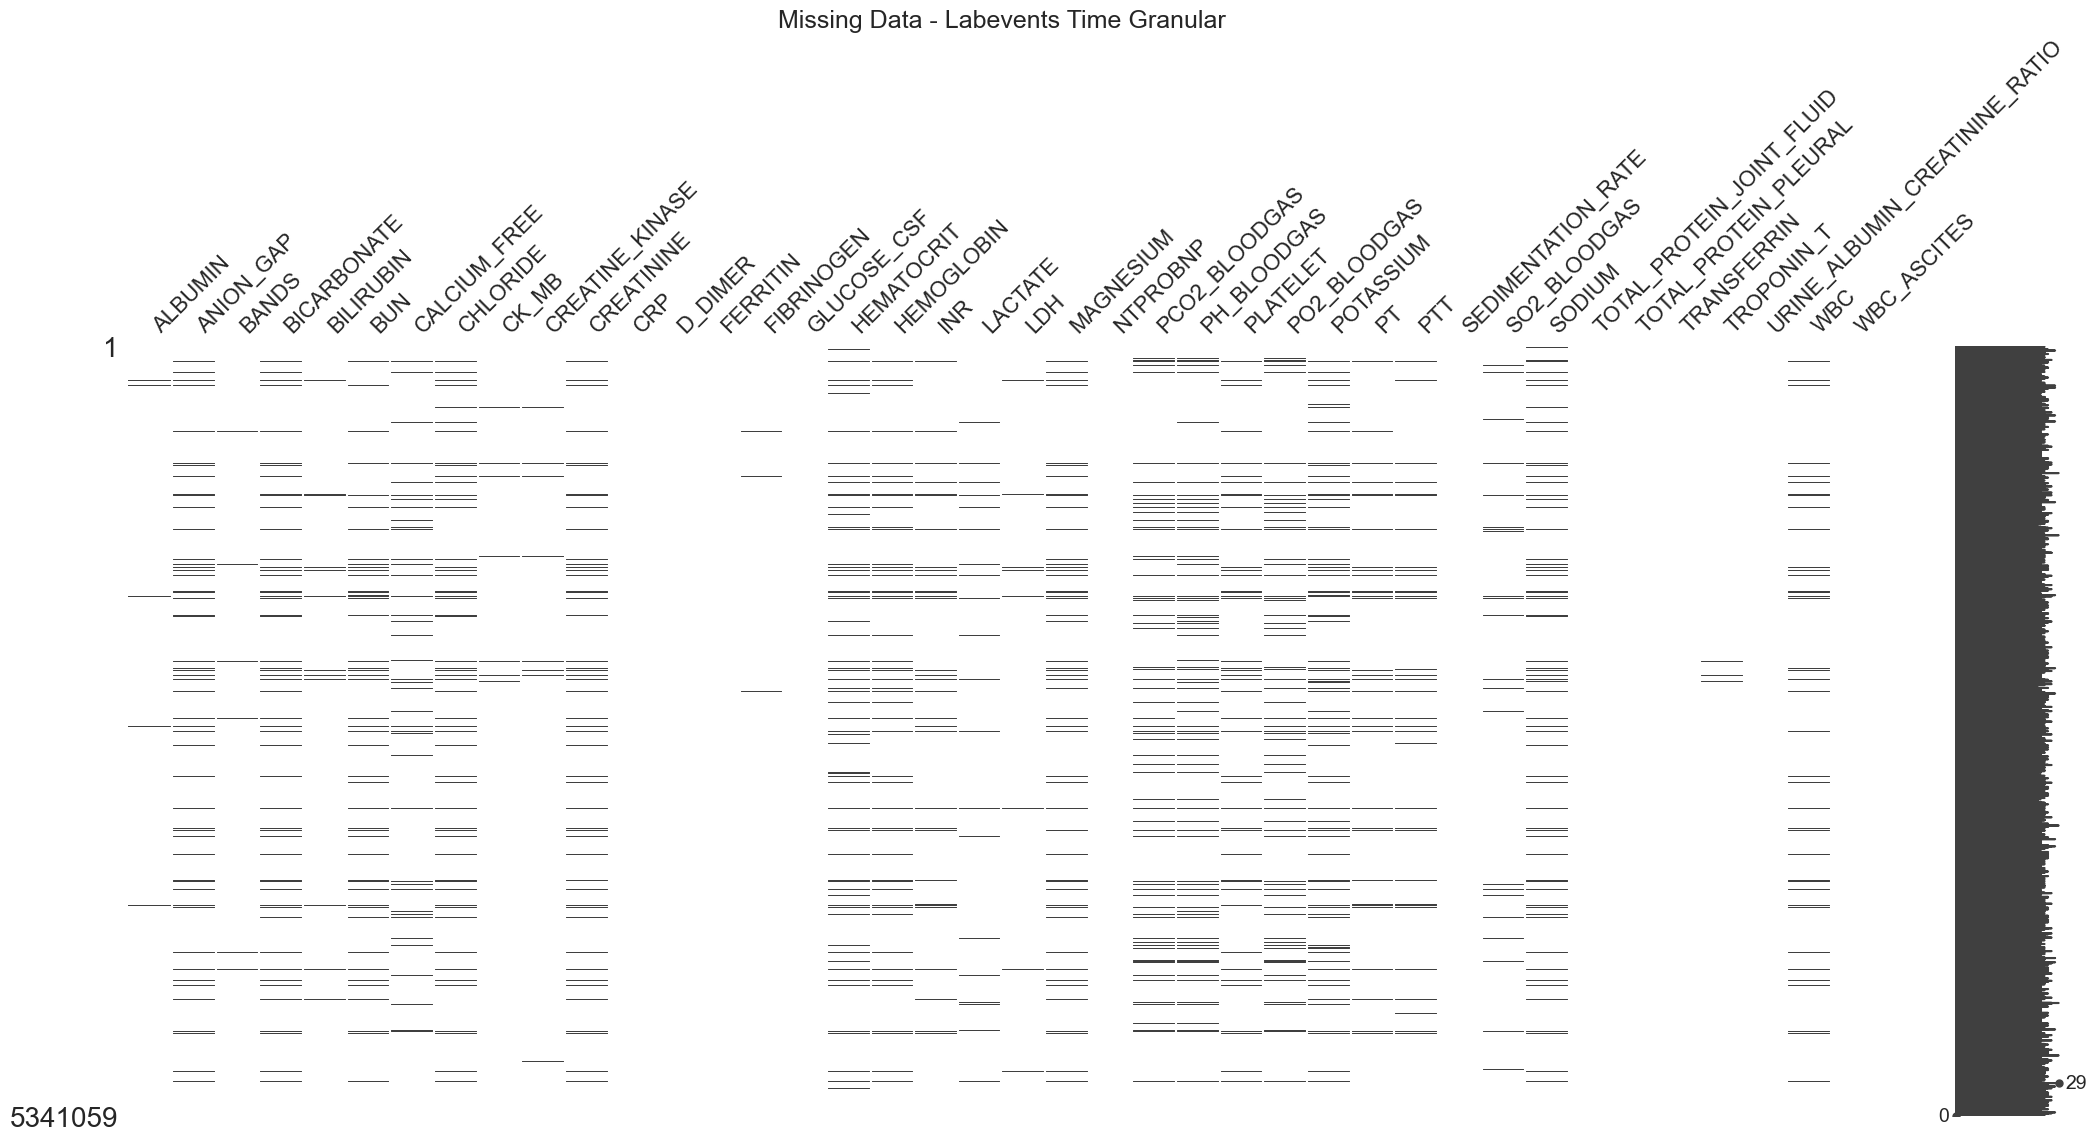

In [6]:
df_labevents_time_shaped = pd.read_csv(project_path()+r"/data/temp_data/df_labevents_time_shaped.csv", index_col=0)
data = df_labevents_time_shaped.iloc[:,4:]

msno.matrix(data)
plt.title("Missing Data - Labevents Time Granular", fontsize=18)
plt.show()

# Finding cutoff for missing data per ICUSTAY, used for data exclusion

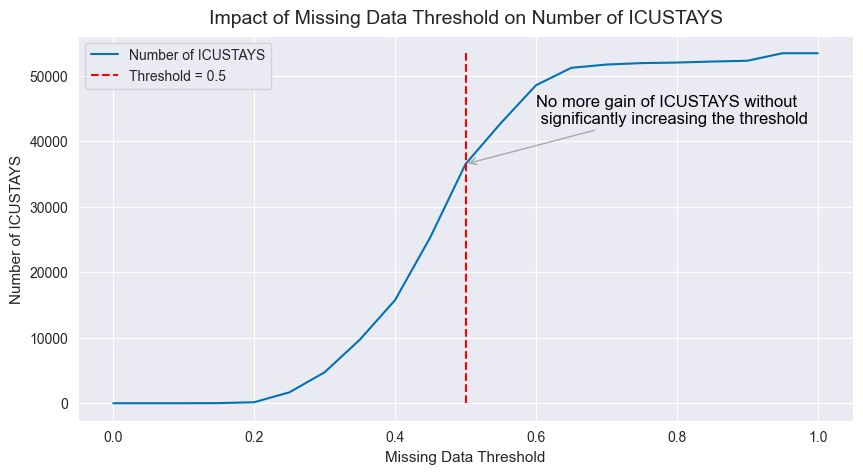

In [7]:
df_labevents_time_shaped    = pd.read_csv(project_path()+r"/data/temp_data/df_labevents_time_shaped.csv")
df_labevents_time_shaped    = df_labevents_time_shaped.groupby("ICUSTAY_ID").max()
df_labevents_time_na        = df_labevents_time_shaped.isna().mean(axis=1)

# Prepare data for plotting
number_of_icustays = []
missing_data_threshold = []
for i in np.arange(0, 1.05, 0.05):
    calc = df_labevents_time_na[df_labevents_time_na <= i]
    number_of_icustays.append(len(calc))
    missing_data_threshold.append(i)

plt.figure(figsize=(10, 5))
plt.plot(missing_data_threshold, number_of_icustays, label="Number of ICUSTAYS")

plt.vlines(x=0.5, ymin=min(number_of_icustays), ymax=max(number_of_icustays), 
           linestyles="dashed", colors="red", label="Threshold = 0.5")
plt.annotate("No more gain of ICUSTAYS without \n significantly increasing the threshold", 
             xy=(0.5, number_of_icustays[10]), xytext=(0.6, max(number_of_icustays)*0.8),
             arrowprops=dict(facecolor='darkgrey', edgecolor='darkgrey', arrowstyle="->"),
             fontsize=12, color='black')
plt.xlabel("Missing Data Threshold", fontsize=11)
plt.ylabel("Number of ICUSTAYS", fontsize=11)
plt.title("Impact of Missing Data Threshold on Number of ICUSTAYS", fontsize=14, pad=9)
plt.legend()
plt.show()

# Chartevents - Comparison between reduced data and imputed data

In [8]:
df_chartevents_reduced  = pd.read_csv(project_path()+r"./data/temp_data/df_chartevents_time_reduced.csv", index_col=0)
df_chartevents_filled   = pd.read_csv(project_path()+r"./data/temp_data/df_chartevents_time_filled.csv", index_col=0)
df_chartevents_imputed  = pd.read_csv(project_path()+r"./data/temp_data/df_chartevents_time_imputed.csv", index_col=0)

In [18]:
pd.DataFrame((df_chartevents_filled.iloc[:,4:].isna().sum() / len(df_chartevents_reduced)).sort_values().apply(lambda x: str(round(x*100, 2)) +"%"), columns=["percentag_of_missing_data"])

,percentag_of_missing_data
DIABP,0.0%
MEANBP,0.0%
SYSBP,0.0%
HEARTRATE,0.0%
RESPRATE,0.0%
GCSEYES,0.01%
GCSVERBAL,0.01%
GCSMOTOR,0.01%
SPO2_PULSOXY,0.03%
GLUCOSE,0.06%


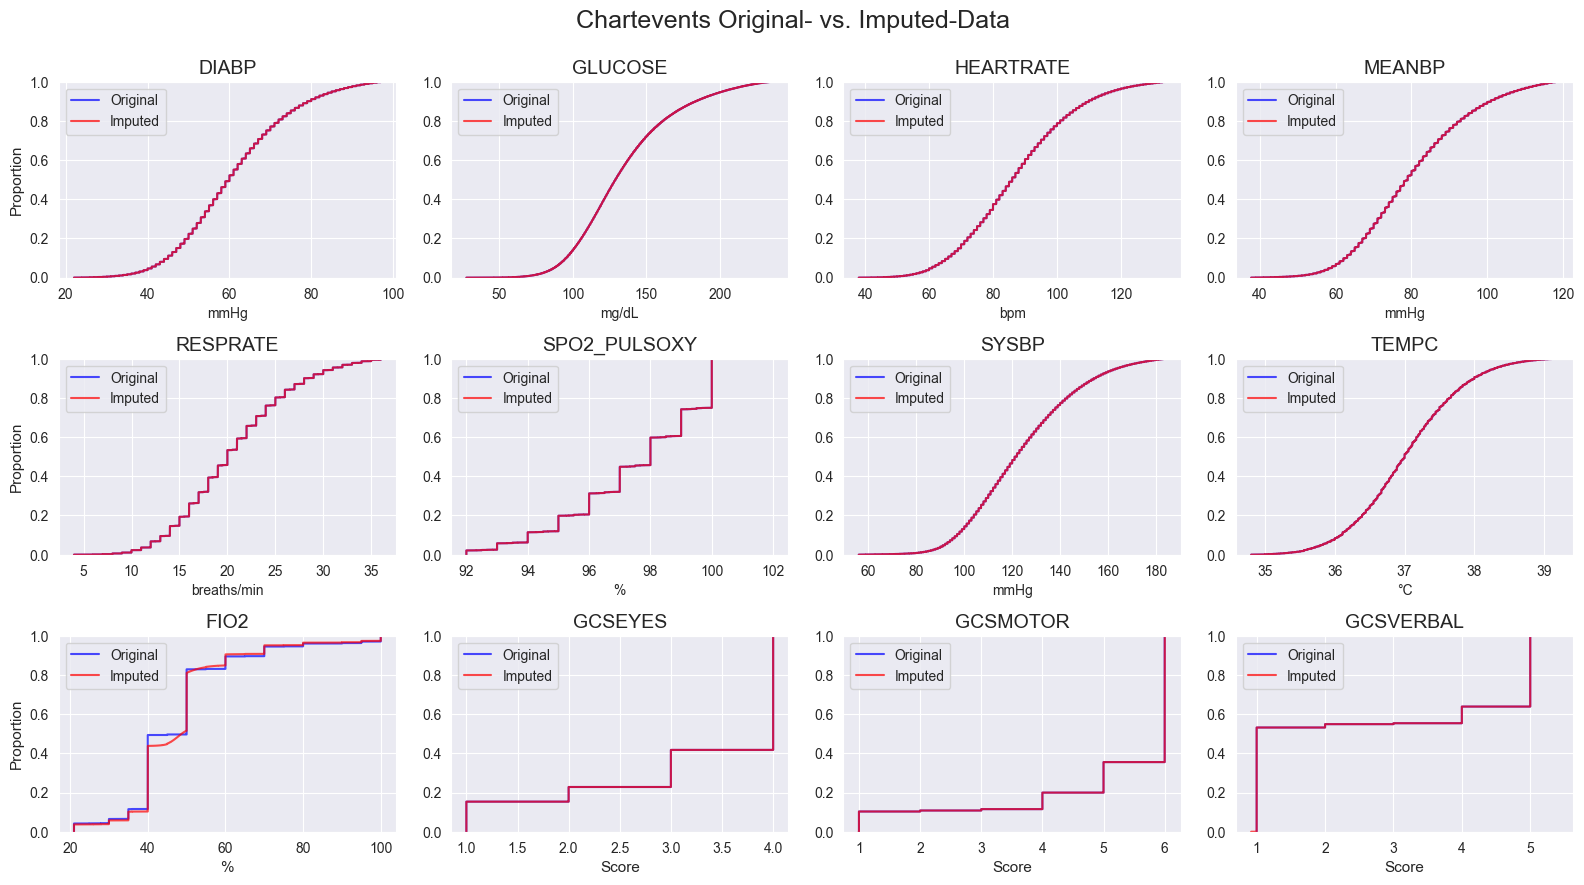

In [10]:
n_cols      = 4
n_labels    = len(df_chartevents_imputed.columns[4:])
n_rows      = int(np.ceil(n_labels / n_cols))

plt.figure(figsize=(4 * n_cols, 3 * n_rows))
plt.suptitle("Chartevents Original- vs. Imputed-Data", fontsize=18)

for i, col in enumerate(df_chartevents_imputed.columns[4:]):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.ecdfplot(df_chartevents_filled[col], label='Original', color='blue', alpha=0.7, ax=ax)
    sns.ecdfplot(df_chartevents_imputed[col], label='Imputed', color='red', alpha=0.7, ax=ax)
    plt.legend()
    plt.title(col, fontsize=14)
    
    # Only set xlabel for bottom plots
    if i >= (n_rows - 1) * n_cols:
        ax.set_xlabel("VALUENUM", fontsize=11)
    else:
        ax.set_xlabel('')
    
    # Only set ylabel for leftmost plots
    if i % n_cols == 0:
        ax.set_ylabel("Proportion", fontsize=11)
    else:
        ax.set_ylabel('')
    plt.xlabel(map_units[col])
plt.tight_layout(pad=1.2)
plt.subplots_adjust(top=0.9)
plt.show()


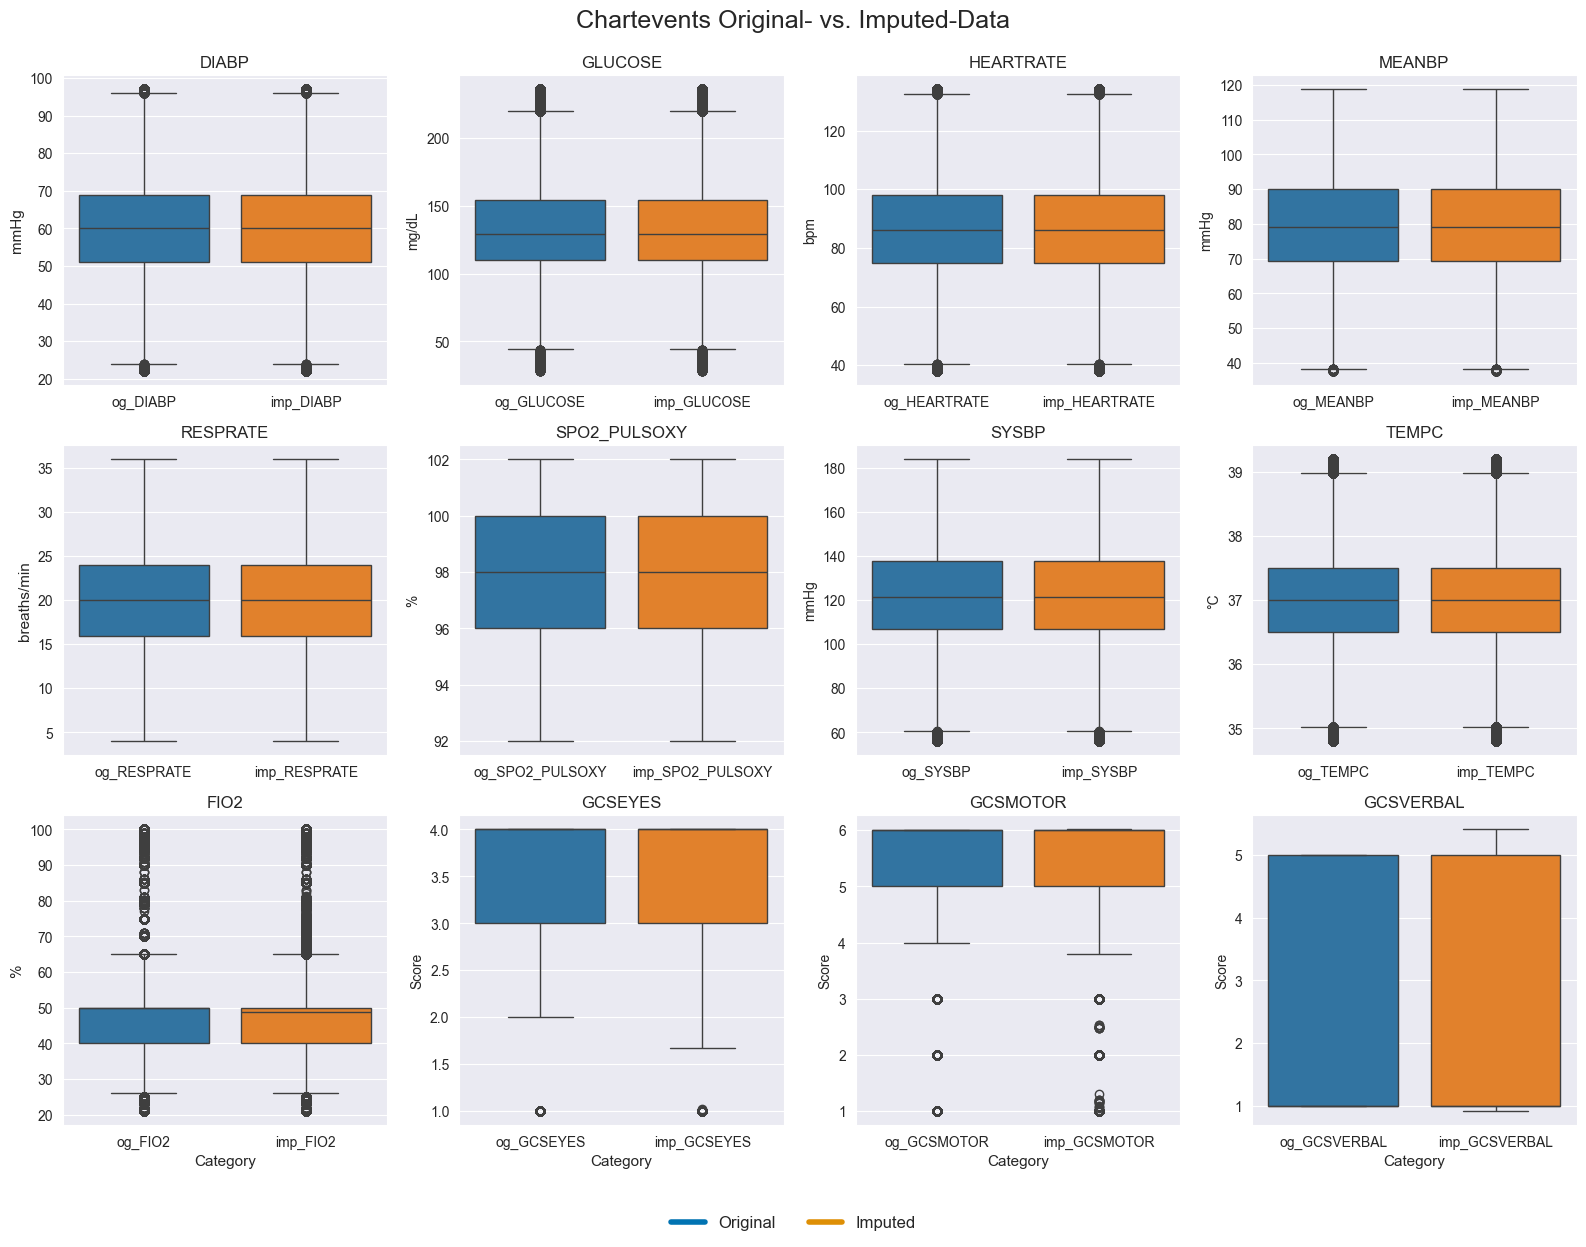

In [11]:
# Number of columns and rows for the subplot grid
n_cols = 4
n_labels = len(df_chartevents_imputed.columns[4:])
n_rows = int(np.ceil(n_labels / n_cols))

# Set up the figure
plt.figure(figsize=(4 * n_cols, 4 * n_rows))
plt.suptitle("Chartevents Original- vs. Imputed-Data", fontsize=18)

# Loop through the columns and create the subplots
for i, col in enumerate(df_chartevents_imputed.columns[4:]):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    og = df_chartevents_filled[col]
    imp = df_chartevents_imputed[col]
    combined_df = pd.concat([og, imp], axis=1)
    combined_df.columns = ["og_" + combined_df.columns[0], "imp_" + combined_df.columns[1]]
    combined_df = combined_df.stack().reset_index()
    
    # Use Seaborn's default blue and orange colors
    sns.boxplot(x="level_1", y=0, data=combined_df, ax=ax, palette=sns.color_palette(["#1f77b4", "#ff7f0e"]))
    plt.title(col)
    
    # Only set x-label for bottom plots
    if i >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Category", fontsize=11)  # You might want to customize the label text
    else:
        ax.set_xlabel("") 

    # Only set y-label for leftmost plots
    if i % n_cols == 0:
        ax.set_ylabel("VALUENUM", fontsize=11)
    else:
        ax.set_ylabel("") 
    plt.ylabel(map_units[col])
    plt.legend([], [], frameon=False)

# Create the legend
handles = [
    plt.Line2D([0], [0], color=sns.color_palette()[0], lw=4),
    plt.Line2D([0], [0], color=sns.color_palette()[1], lw=4)
]
labels = ["Original", "Imputed"]
plt.figlegend(handles, labels, loc='lower center', ncol=2, fontsize=12, frameon=False, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(pad=1.2)
plt.subplots_adjust(top=0.925)
plt.show()


# Labevents - Comparison between reduced data and imputed data

In [12]:
df_labevents_reduced    = pd.read_csv(project_path()+r"./data/temp_data/df_labevents_time_reduced.csv", index_col=0)
df_lab_filled           = pd.read_csv(project_path()+r"./data/temp_data/df_labevents_time_filled.csv", index_col=0)
df_lab_imputed          = pd.read_csv(project_path()+r"./data/temp_data/df_labevents_time_imputed.csv", index_col=0)

In [13]:
pd.DataFrame((df_lab_filled.loc[:,df_lab_imputed.columns[4:]].isna().sum() / len(df_labevents_reduced)).sort_values().apply(lambda x: str(round(x*100, 2)) +"%"), columns=["percentag_of_missing_data"])

,percentag_of_missing_data
POTASSIUM,0.02%
CHLORIDE,0.03%
SODIUM,0.06%
BICARBONATE,0.16%
HEMOGLOBIN,0.18%
HEMATOCRIT,0.21%
PLATELET,0.28%
ANION_GAP,0.4%
WBC,0.55%
MAGNESIUM,0.79%


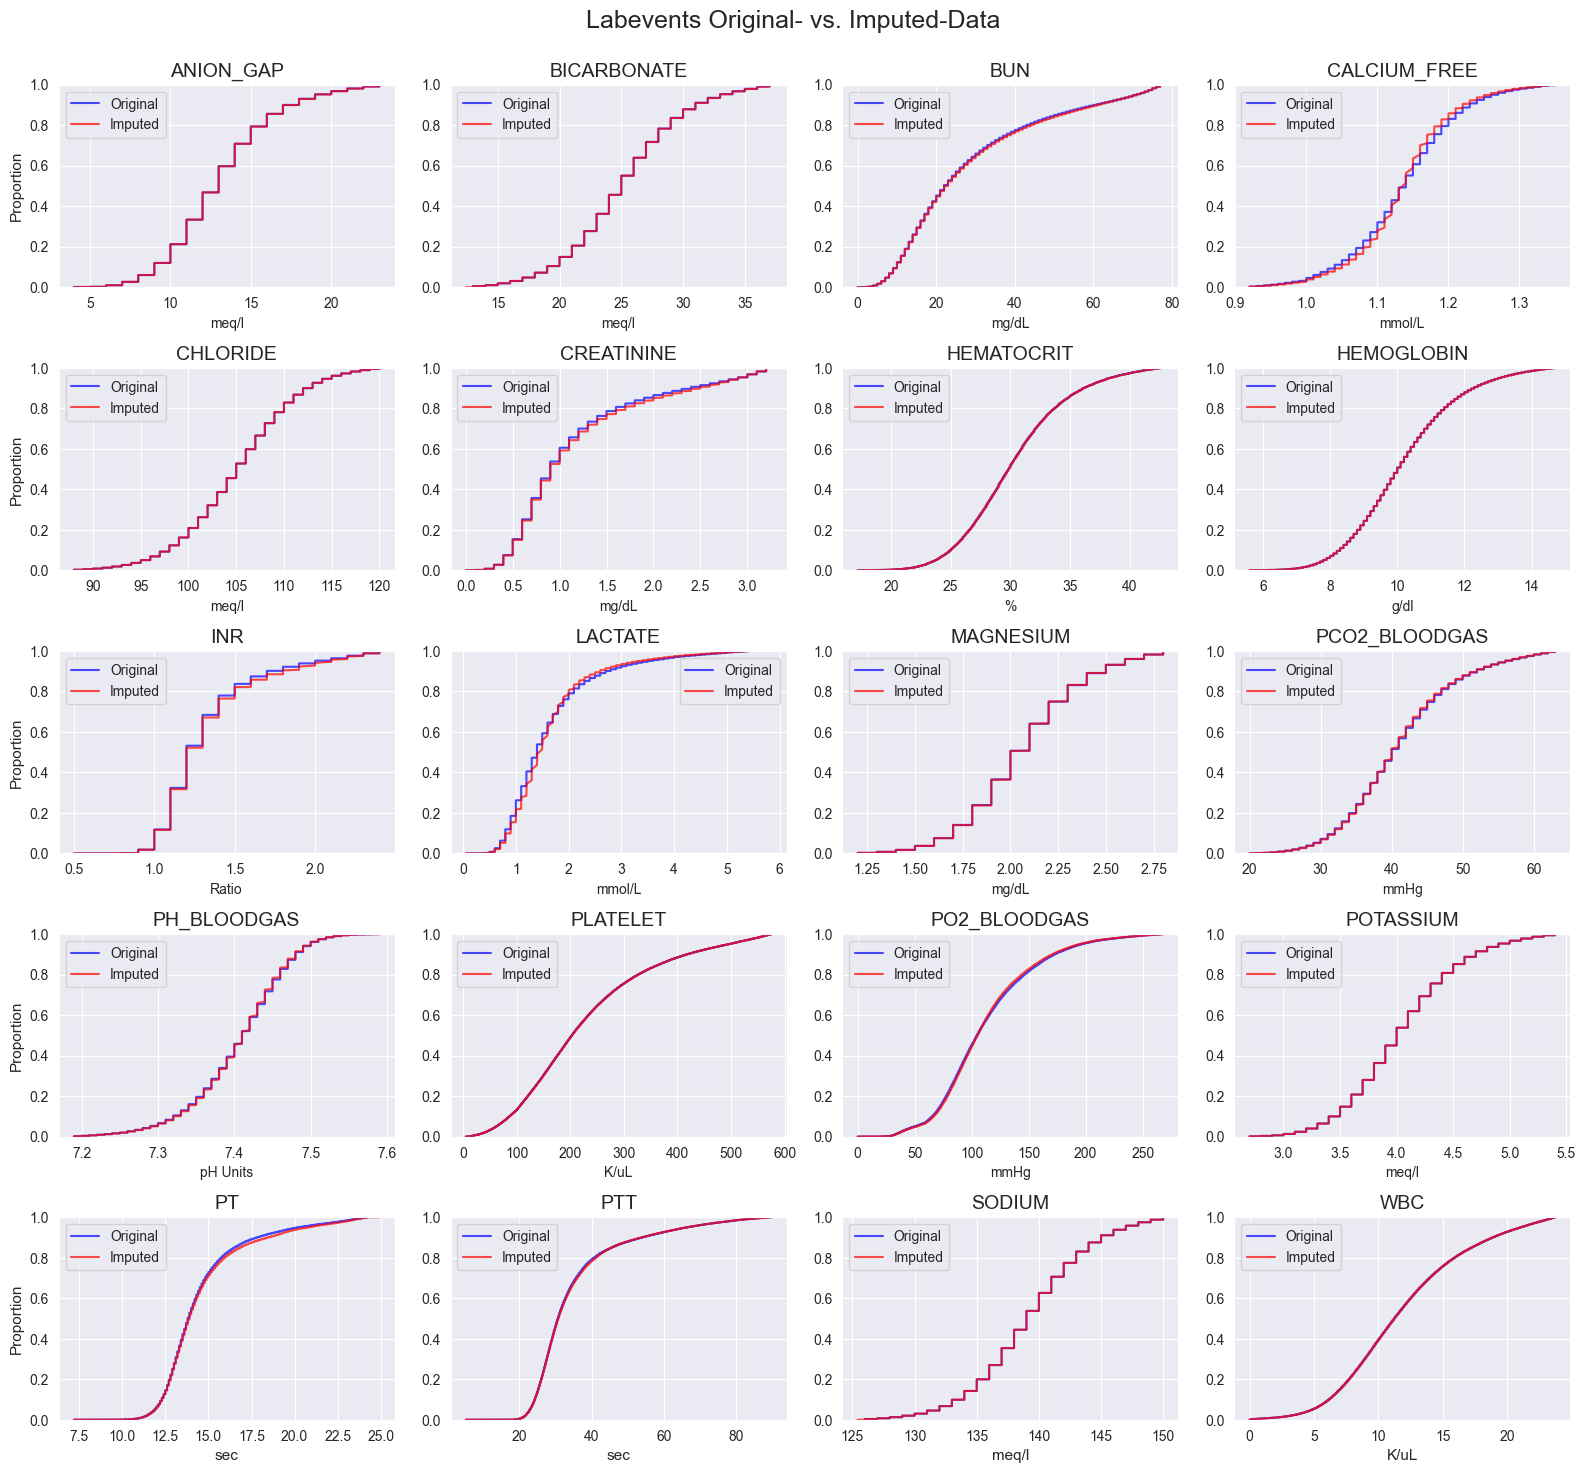

In [14]:
n_cols = 4
n_labels = len(df_lab_imputed.columns[4:])
n_rows = int(np.ceil(n_labels / n_cols))

plt.figure(figsize=(4 * n_cols, 3 * n_rows))
plt.suptitle("Labevents Original- vs. Imputed-Data", fontsize=18)

for i, col in enumerate(df_lab_imputed.columns[4:]):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.ecdfplot(df_lab_filled[col], label='Original', color='blue', alpha=0.7, ax=ax)
    sns.ecdfplot(df_lab_imputed[col], label='Imputed', color='red', alpha=0.7, ax=ax)
    plt.legend()
    plt.title(col, fontsize=14)
    
    # Only set xlabel for bottom plots
    if i >= (n_rows - 1) * n_cols:
        ax.set_xlabel("VALUENUM", fontsize=11)
    else:
        ax.set_xlabel('')
    
    # Only set ylabel for leftmost plots
    if i % n_cols == 0:
        ax.set_ylabel("Proportion", fontsize=11)
    else:
        ax.set_ylabel('')
    plt.xlabel(map_units[col])
plt.tight_layout(pad=1.2)
plt.subplots_adjust(top=0.93)
plt.show()


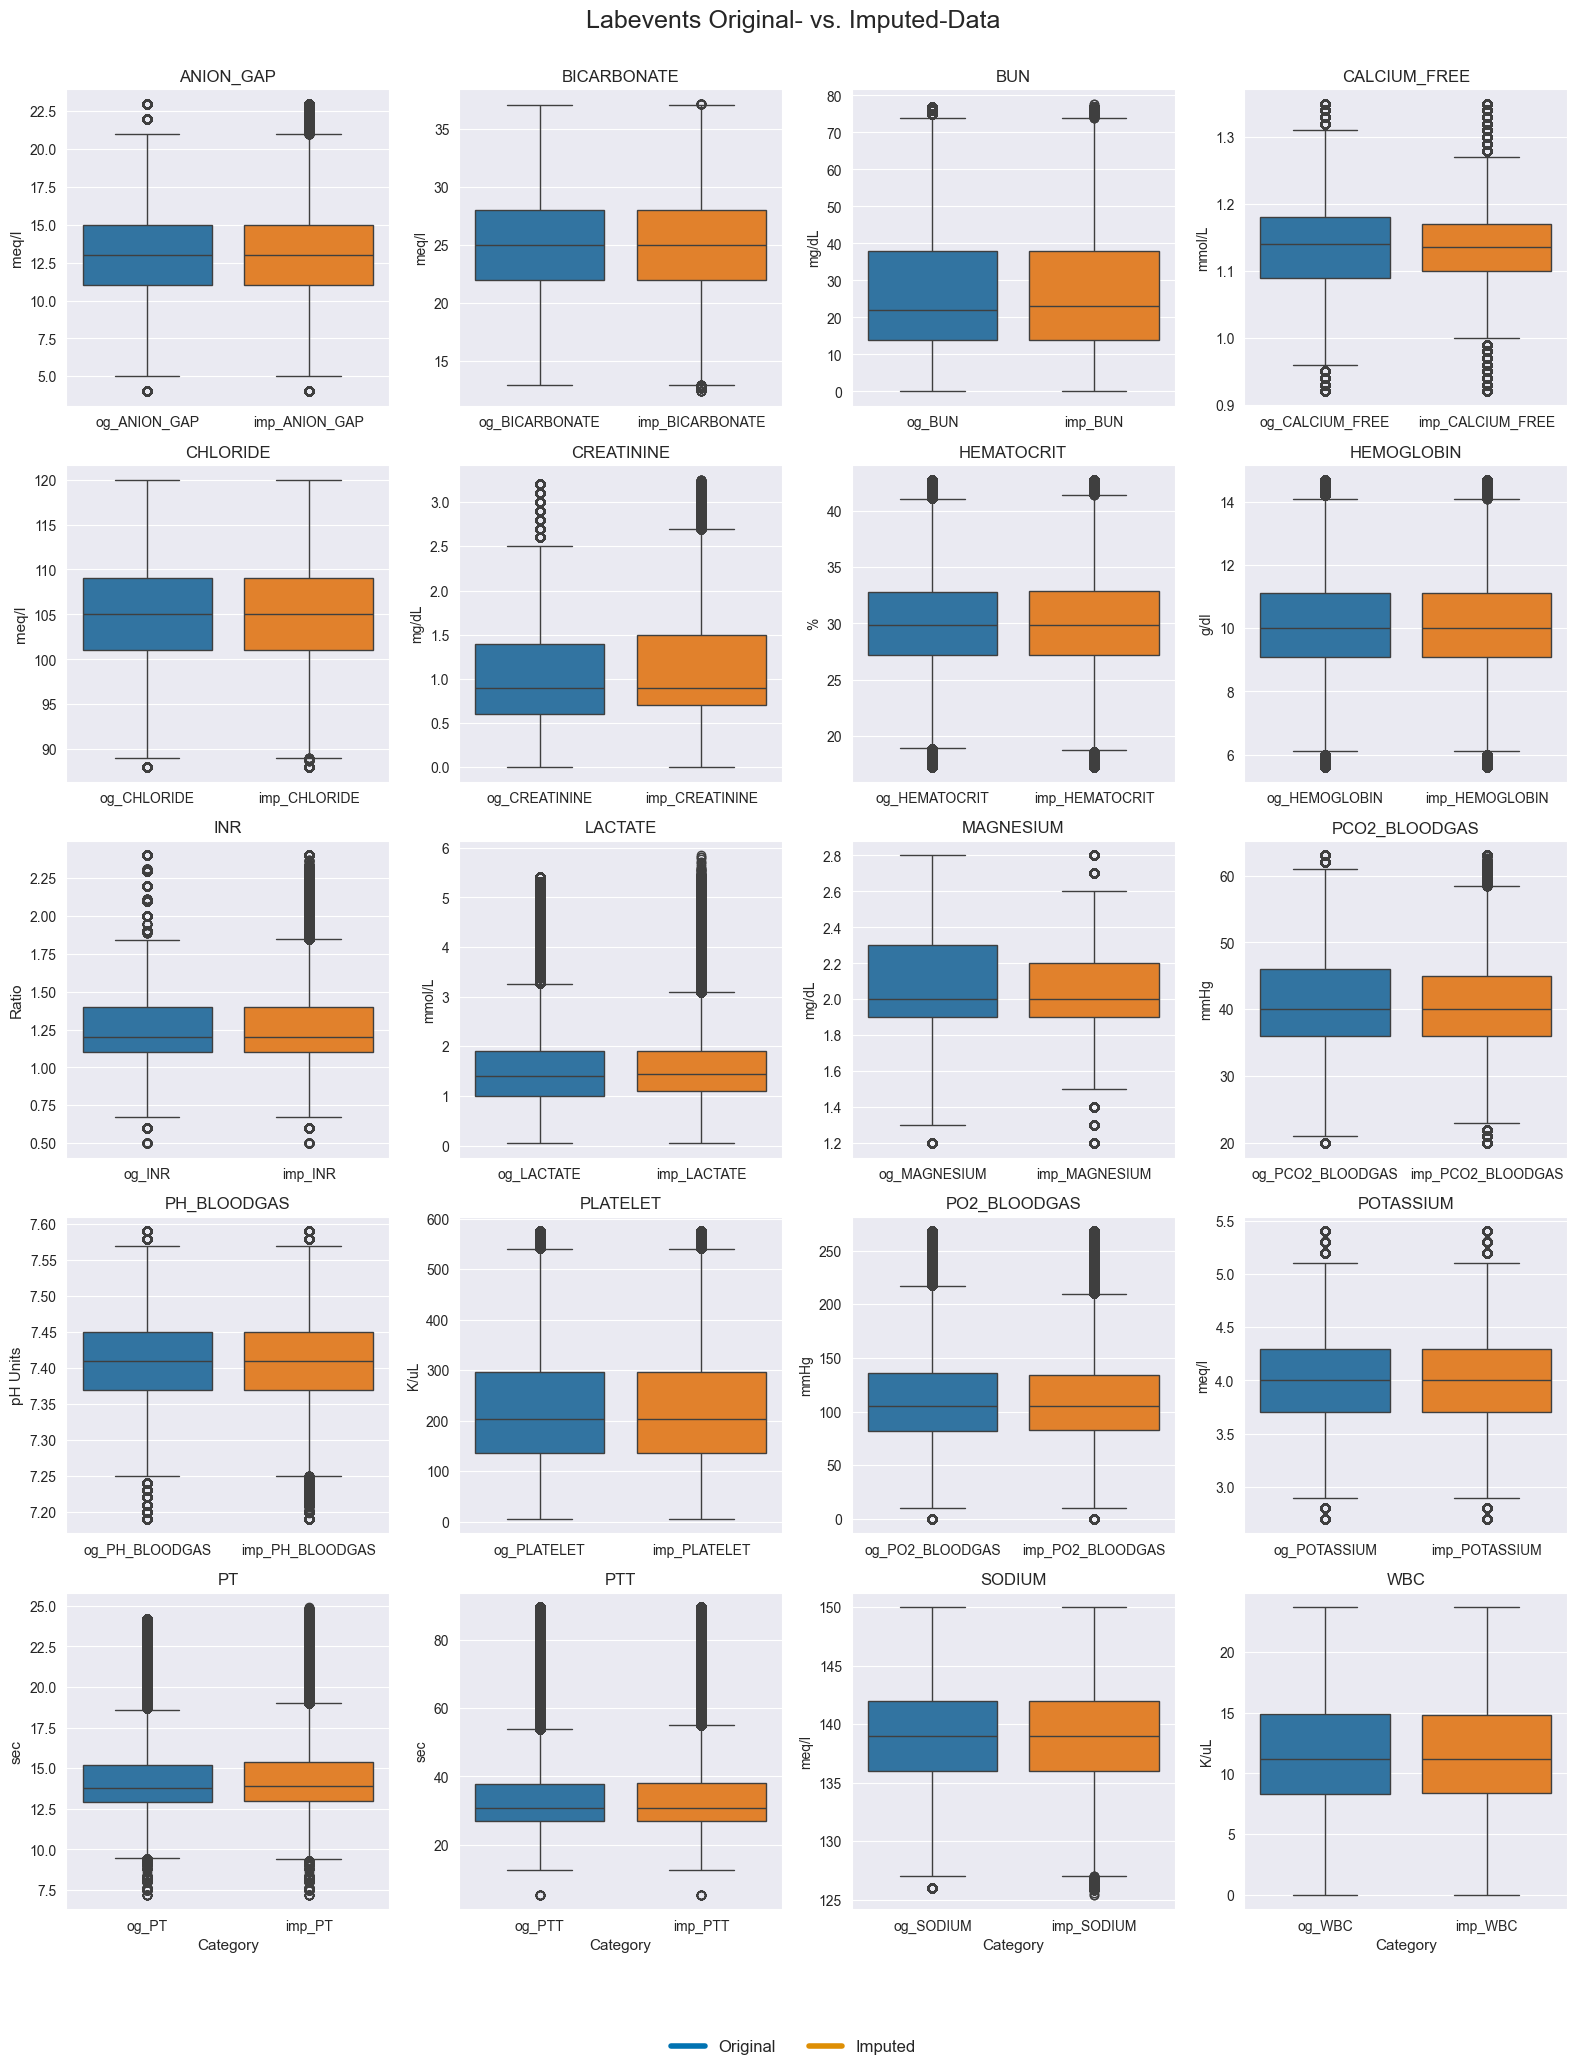

In [16]:
# Number of columns and rows for the subplot grid
n_cols = 4
n_labels = len(df_lab_imputed.columns[4:])
n_rows = int(np.ceil(n_labels / n_cols))

# Set up the figure
plt.figure(figsize=(4 * n_cols, 4 * n_rows))
plt.suptitle("Labevents Original- vs. Imputed-Data", fontsize=18)

# Loop through the columns and create the subplots
for i, col in enumerate(df_lab_imputed.columns[4:]):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    og = df_lab_filled[col]
    imp = df_lab_imputed[col]
    combined_df = pd.concat([og, imp], axis=1)
    combined_df.columns = ["og_" + combined_df.columns[0], "imp_" + combined_df.columns[1]]
    combined_df = combined_df.stack().reset_index()
    
    # Use Seaborn's default blue and orange colors
    sns.boxplot(x="level_1", y=0, data=combined_df, ax=ax, palette=sns.color_palette(["#1f77b4", "#ff7f0e"]))
    plt.title(col)
    
    # Only set xlabel for bottom plots
    if i >= (n_rows - 1) * n_cols:
        ax.set_xlabel("Category", fontsize=11)  # Adjust the label as needed
    else:
        ax.set_xlabel("") 

    # Only set ylabel for leftmost plots
    if i % n_cols == 0:
        ax.set_ylabel("VALUENUM", fontsize=11)
    else:
        ax.set_ylabel("") 
    plt.ylabel(map_units[col])
    plt.legend([], [], frameon=False)

# Create the legend
handles = [
    plt.Line2D([0], [0], color=sns.color_palette()[0], lw=4),
    plt.Line2D([0], [0], color=sns.color_palette()[1], lw=4)
]
labels = ["Original", "Imputed"]
plt.figlegend(handles, labels, loc='lower center', ncol=2, fontsize=12, frameon=False, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(pad=1.2)
plt.subplots_adjust(top=0.94)
plt.show()
